<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Automobile Sales Analysis During Recession Periods** 




# __Table of Contents__

<ol>
    <li><a href="#Objectives">Objectives</a></li>
    <li>
        <a href="#Setup">Setup</a>
        <ol>
            <li><a href="#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="#Importing-Required-Libraries">Importing Required Libraries</a></li>
            </ol>
    </li>
    <li>
        <a href="#Scenario">Scenario</a>
        <ol>
            <li><a href="#Data Description">Data Description</a></li>
        </ol>
    </li>
    <li><a href="#Importing Data">Importing data</a></li>
    <li><a href="#Creating Visualizations for Data Analysis">Creating Visualizations for Data Analysis</a></li>
</ol>


# Objectives


-Analyze the impact of recession periods on automobile sales, focusing on key economic factors such as GDP, unemployment rate, and consumer confidence.

-Examine sales trends across different vehicle types during recession and non-recession periods.

-Visualize data using various techniques, including line charts, bar plots, and pie charts, to highlight fluctuations in sales.

-Develop an interactive Dash dashboard to enable dynamic exploration of the data and insights into sales performance during economic downturns.


# Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.
*  [`Folium`](https://python-visualization.github.io/folium/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for plotting.


### Installing Required Libraries

The following required libraries are pre-installed in the Skills Network Labs environment. However, if you run these notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda), you will need to install these libraries by removing the `#` sign before `%pip` in the code cell below.


In [1]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# %pip install -qy pandas==1.3.4 numpy==1.21.4 matplotlib==3.5.0 seaborn folium
# Note: If your environment doesn't support "%pip install", use "!mamba install"

In [2]:
%pip install seaborn
%pip install folium

### Importing Required Libraries




In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

<ipython-input-3-107089beb3f3>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


---


# Scenario

In this notebook plots are created which answer questions for analysing "historical_automobile_sales" data to understand the historical trends in automobile sales during recession periods.<br>
recession period 1 - year 1980 <br>
recession period 2 - year 1981 to 1982<br>
recession period 3 - year 1991<br>
recession period 4 - year 2000 to 2001<br>
recession period 5 - year end 2007 to mid 2009<br>
recession period 6 - year 2020 -Feb to April (Covid-19 Impact)<br>

# Data Description

The dataset used for this visualization assignment contains *historical_automobile_sales* data representing automobile sales and related variables during recession and non-recession period. 

The dataset includes the following variables:
<br>1. Date: The date of the observation.
<br>2. Recession: A binary variable indicating recession perion; 1 means it was recession, 0 means it was normal.
<br>3. Automobile_Sales: The number of vehicles sold during the period.
<br>4. GDP: The per capita GDP value in USD.
<br>5. Unemployment_Rate: The monthly unemployment rate.
<br>6. Consumer_Confidence: A synthetic index representing consumer confidence, which can impact consumer spending and automobile purchases.
<br>7. Seasonality_Weight: The weight representing the seasonality effect on automobile sales during the period.
<br>8. Price: The average vehicle price during the period.
<br>9. Advertising_Expenditure: The advertising expenditure of the company.
<br>10.Vehicle_Type: The type of vehicles sold; Supperminicar, Smallfamiliycar,                 Mediumfamilycar, Executivecar, Sports.
<br>11.Competition: The measure of competition in the market, such as the number of competitors or market share of major manufacturers.
<br>12.Month: Month of the observation extracted from Date..
<br>13.Year: Year of the observation extracted from Date.
<br>
By examining various factors mentioned above from the dataset, you aim to gain insights into how recessions impacted automobile sales for your company.


---


# Importing Data


In [4]:
from js import fetch
import io

URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
resp = await fetch(URL)
text = io.BytesIO((await resp.arrayBuffer()).to_py())
import pandas as pd
df = pd.read_csv(text)
print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [5]:
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [6]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

---


# Creating Visualizations for Data Analysis


### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


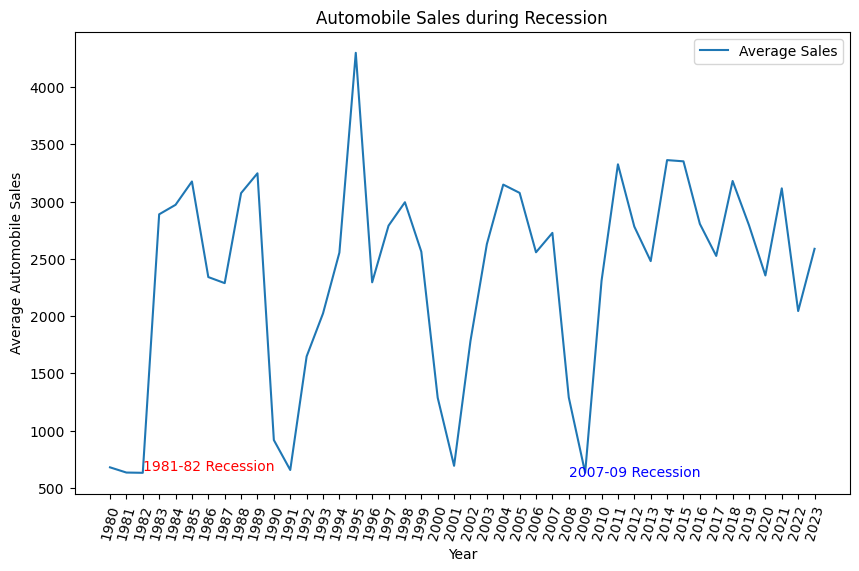

In [7]:
# Create data for plotting
df_line = df.groupby('Year')['Automobile_Sales'].mean()

# Create figure
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')

# Add ticks for x-axis
plt.xticks(list(range(1980, 2024)), rotation=75)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Automobile Sales during Recession')

# Add annotations for recession years
plt.text(1982, 650, '1981-82 Recession', fontsize=10, color='red')
plt.text(2008, 600, '2007-09 Recession', fontsize=10, color='blue')

# Add legend and show the plot
plt.legend(['Average Sales'])
plt.show()


From the line chart, we can see that automobile sales peaked in 1995. During the 2007-2009 recession, sales sharply declined, reaching an all-time low with an average of around 700 units. A similar downturn in sales is also evident during the 1981-1982 recession period.

---



####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?


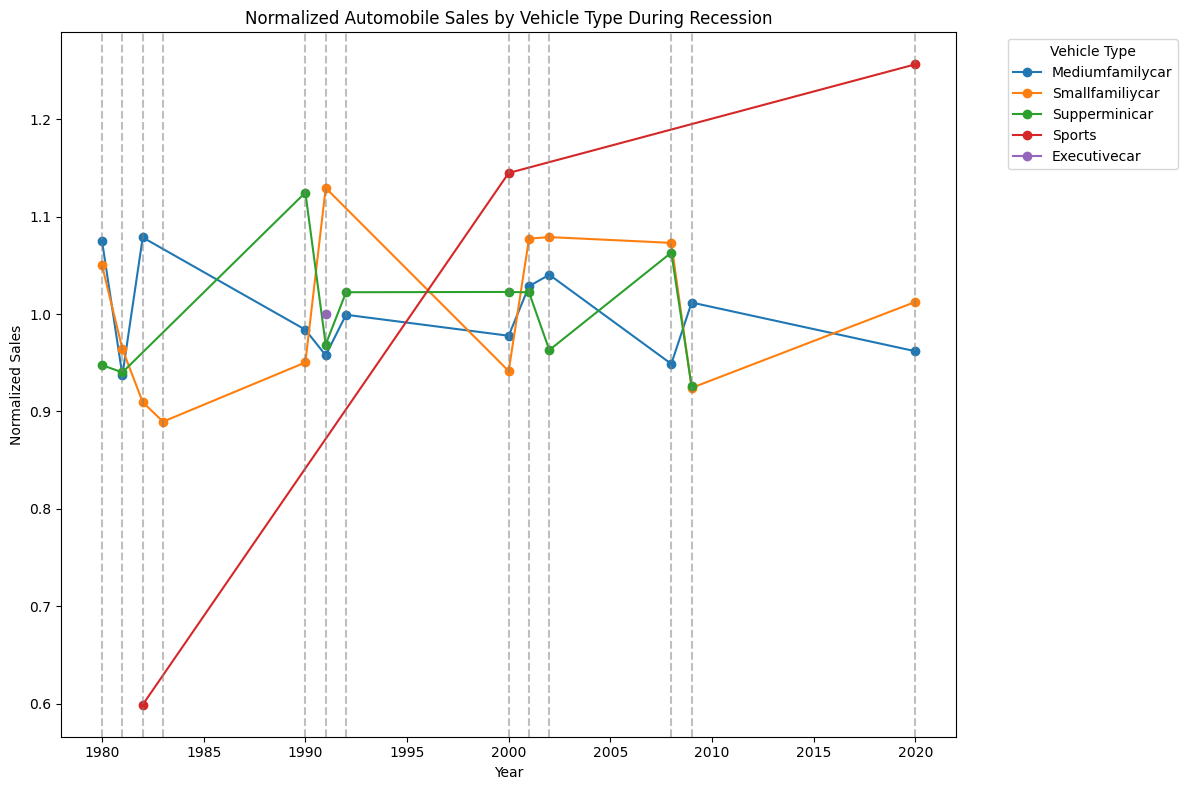

In [9]:
# Filter data for recession periods
df_rec = df[df['Recession'] == 1]

# Calculate the average automobile sales by year and vehicle type during the recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate the normalized sales by dividing by the average sales for each vehicle type
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Set the 'Year' as the index
df_Mline.set_index('Year', inplace=True)

# Create the plot for each vehicle type
plt.figure(figsize=(12, 8))
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data.index, data['Normalized_Sales'], label=vehicle_type, marker='o')

# Highlight recession years
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels, legend, and title
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Normalized Sales")
plt.xlabel("Year")
plt.title("Normalized Automobile Sales by Vehicle Type During Recession")

# Show the plot
plt.tight_layout()
plt.show()


#### From the above plot, what insights have you gained on the sales of various vehicle types?<br> Type in your answer below:


During recession periods, sports cars and supermini cars display resilience or growth, indicating stability in certain niche markets. Medium family cars and, to a lesser extent, small family cars exhibit greater sensitivity to economic changes, with sales trends becoming less consistent. The consistent upward trend in sports vehicle sales highlights the luxury market's stability, even during economic downturns.

----


### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.


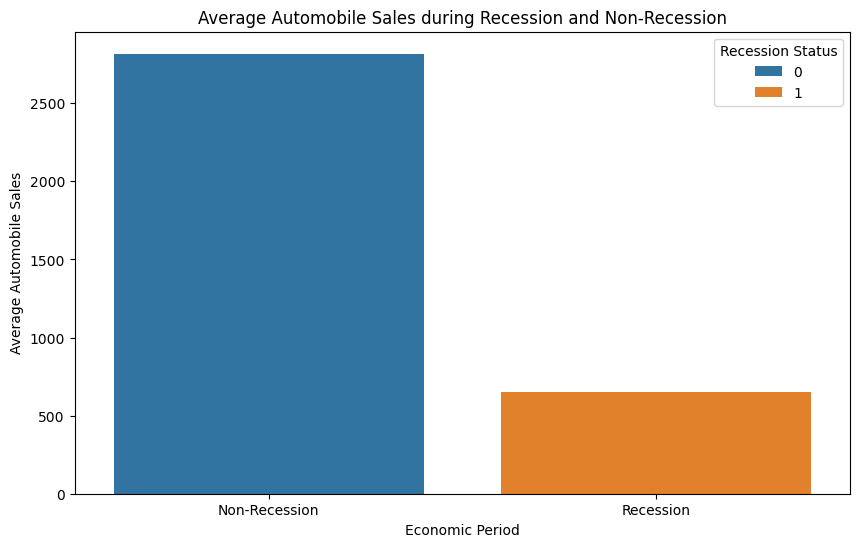

In [10]:
# Group the data by Recession and calculate the average Automobile Sales
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

# Create the bar chart using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data=new_df)
plt.xlabel('Economic Period')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.legend(title="Recession Status", loc='upper right')
plt.show()


The vertical bar chart clearly shows that average automobile sales during non-recession periods are significantly higher, averaging around 2,600 units. In contrast, during recession periods, sales drop to around 600-700 units, highlighting a sharp decline in demand. This pattern is visible during both the 1981-1982 and 2007-2009 recessions.

###  Compare the sales of different vehicle types during a recession and a non-recession period



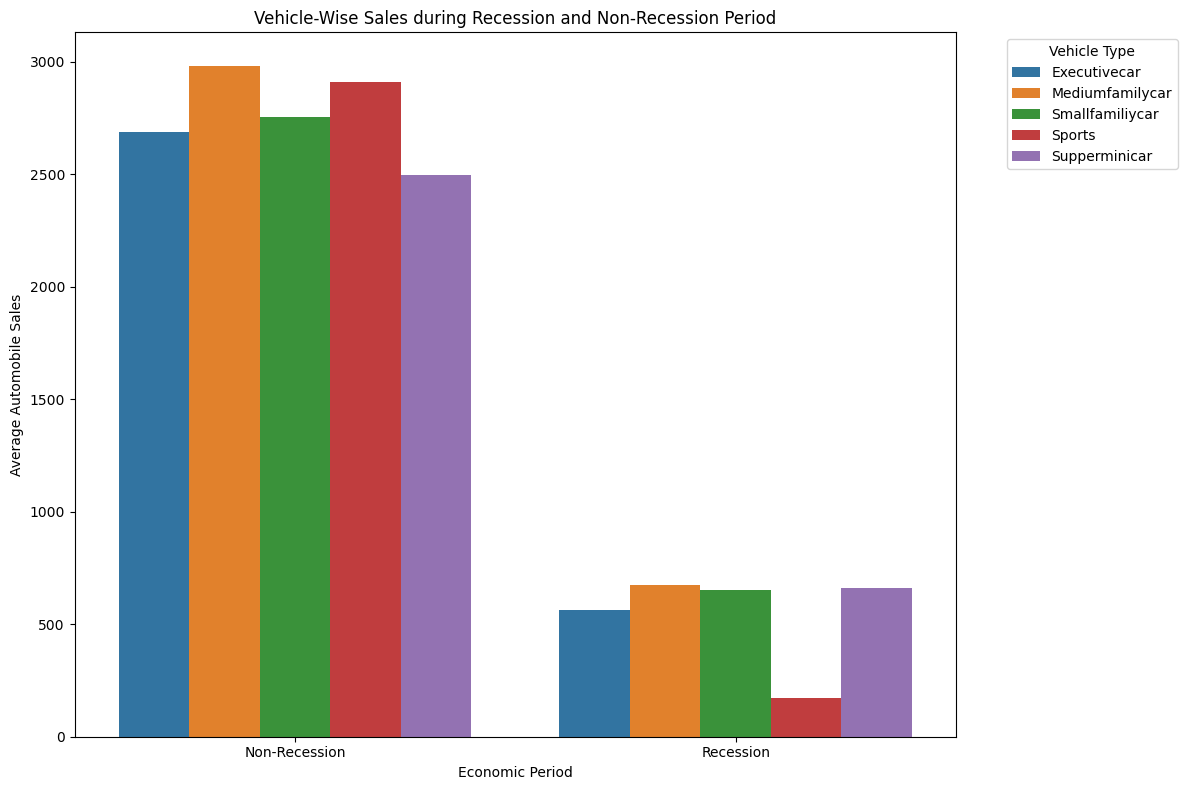

In [11]:
# Group the data by Recession and Vehicle_Type, and calculate the average Automobile Sales
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()

# Create the grouped bar chart using Seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Economic Period')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.legend(title='Vehicle Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### From the above chart what insights have you gained on the overall sales of automobiles during recession? <br> Type your answer below:-


From this bar plot, it is clear that there is a significant decline in the overall sales of automobiles during a recession period. The vehicle types most affected by the recession include Executive Cars and Sports Cars, which show noticeable drops in sales. On the other hand, Medium Family Cars demonstrate a more considerable decline during the recession, while Small Family Cars remain largely unaffected, maintaining consistent sales even during economic downturns.

---


### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

#### How did the GDP vary over time during recession and non-recession periods? 



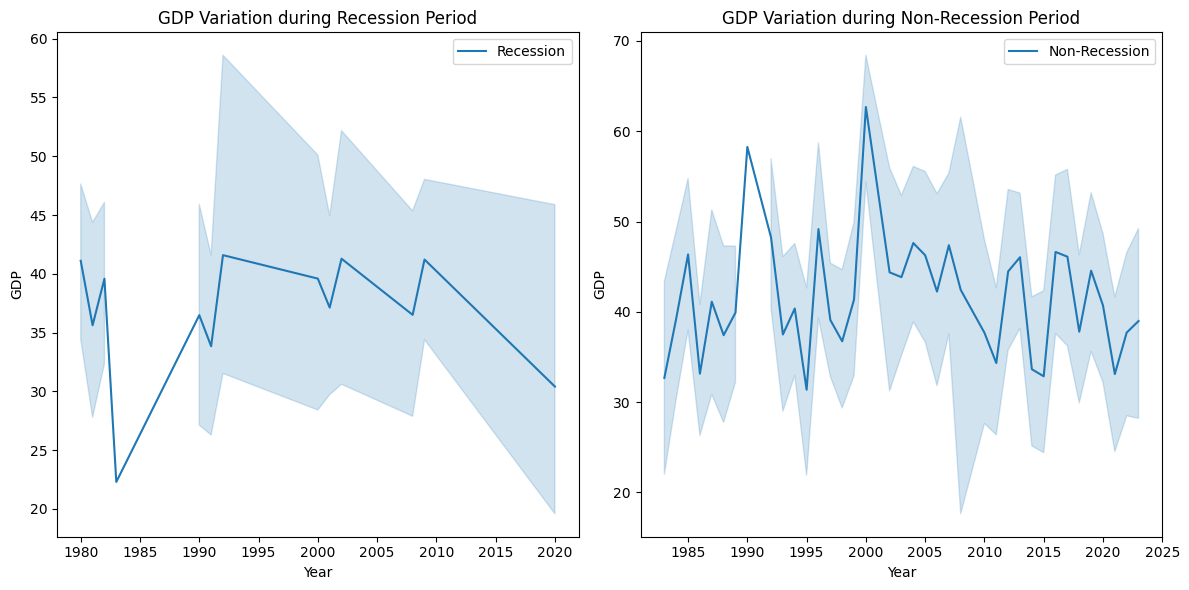

In [12]:
# Create dataframes for recession and non-recession period
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Figure
fig = plt.figure(figsize=(12, 6))

# Create different axes for subplotting
ax0 = fig.add_subplot(1, 2, 1)  # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2)  # add subplot 2 (1 row, 2 columns, second plot)

# Plot GDP variation during recession period
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Plot GDP variation during non-recession period
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()
plt.show()


From this plot, it is evident that during the recession period, the GDP of the country consistently remained at a lower range. This decline in GDP might have had a significant impact on the overall sales of the company, as economic downturns generally lead to reduced consumer spending and lower demand for automobiles. The contrast between the recession and non-recession periods highlights how economic conditions can affect various industries, including the automobile market.

---


### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>



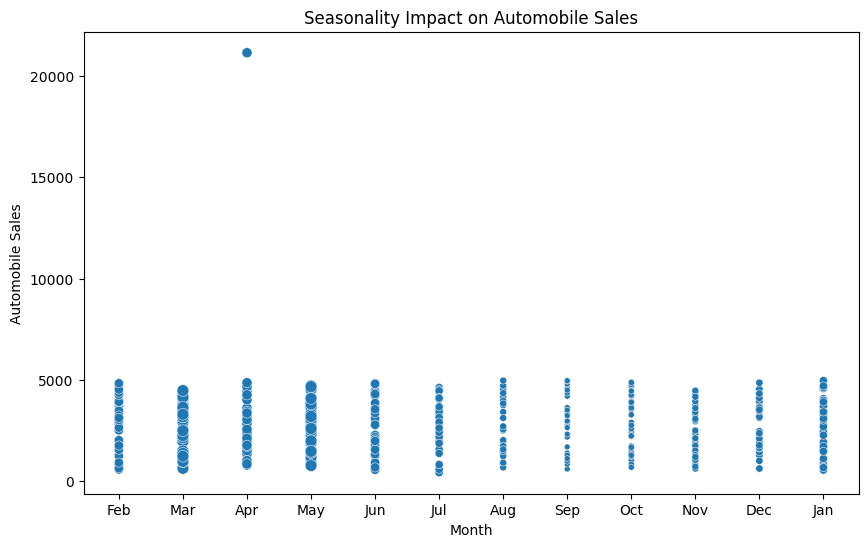

In [13]:
# Filter the data for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Set size for the bubble plot
size = non_rec_data['Seasonality_Weight']  # for bubble effect

# Create the bubble plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size, legend=False)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

# Show the plot
plt.show()


From this plot, it is evident that while seasonality has a noticeable impact on the overall sales, the month of April stands out with a significant increase in sales. The size of the bubble in April suggests that seasonality plays a substantial role in driving up sales during this month, while other months show relatively stable or less pronounced effects.

---


 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 



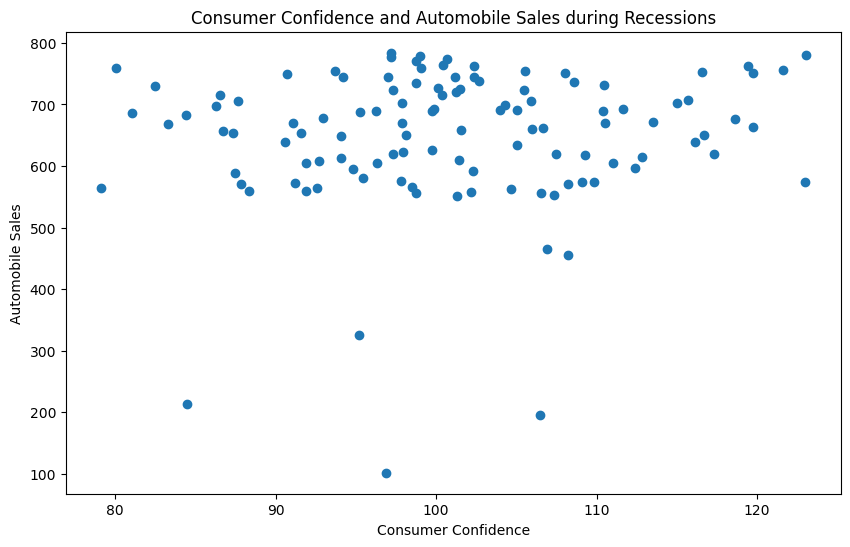

In [15]:
# Create dataframes for recession period
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Add labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence and Automobile Sales during Recessions')

# Show plot
plt.show()



 ### How does the average vehicle price relate to the sales volume during recessions?


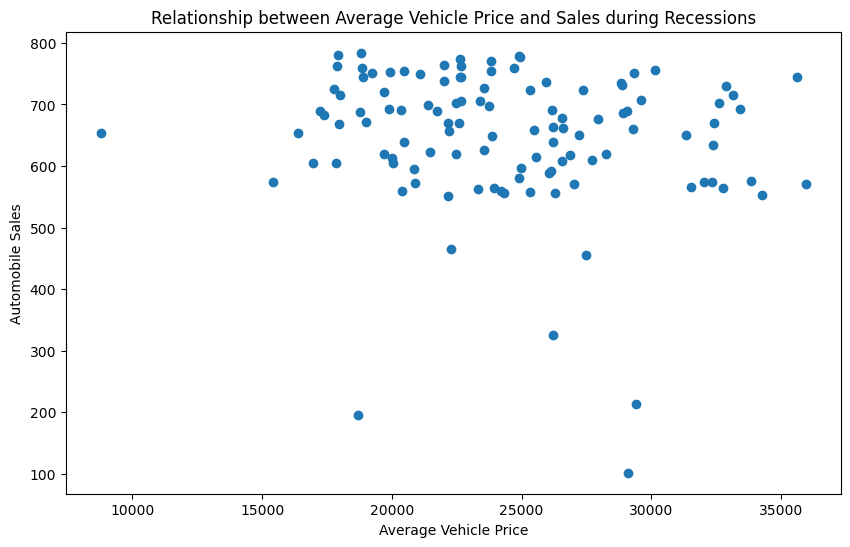

In [17]:
# Create dataframes for recession period
rec_data = df[df['Recession'] == 1]

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])

# Add labels and title
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.title('Relationship between Average Vehicle Price and Sales during Recessions')

# Show plot
plt.show()


From the scatter plot, it is evident that there is little to no clear relationship between average vehicle price and automobile sales during recession periods. The distribution of points appears scattered without a definitive upward or downward trend. This suggests that factors other than price, such as consumer preferences, availability, or external economic influences, may play a more significant role in determining sales during recession times.

----


 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 


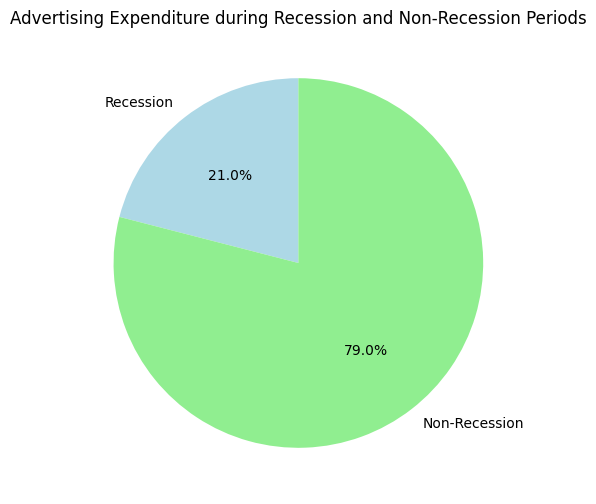

In [18]:
# Filter the data 
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate the total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create a pie chart for the advertising expenditure 
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightgreen'])

plt.title('Advertising Expenditure during Recession and Non-Recession Periods')

plt.show()


#### From the above plot, what insights do you find on the advertisement expenditure during recession and non recession periods?<br> Type your answer below:-


It seems ABC Automotives has been spending much more on advertisements during non-recession periods compared to during recession times. The non-recession period accounts for 79.0% of the total advertising expenditure, while the recession period accounts for only 21.0%. This suggests that the company tends to allocate a larger portion of its advertising budget during favorable economic conditions.

---


### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Lets observe the share of each vehicle type in total expenditure during recessions? 


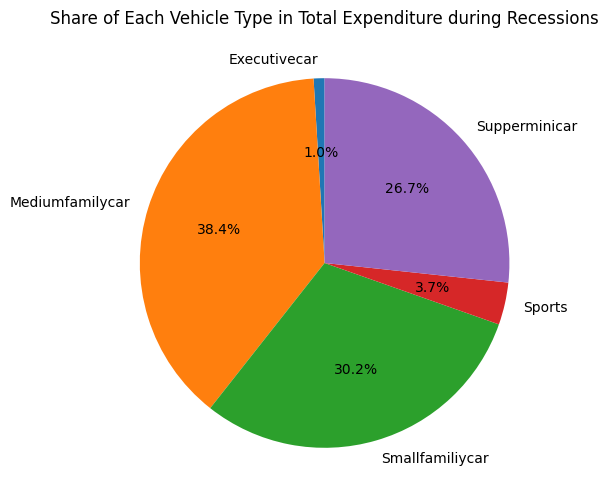

In [19]:
# Filter the data for recession periods
Rdata = df[df['Recession'] == 1]

# Calculate the advertisement expenditure by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create a pie chart for the share of each vehicle type in total expenditure during recessions
plt.figure(figsize=(8, 6))

# Define labels and sizes for the pie chart
labels = VTexpenditure.index
sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

# Title for the plot
plt.title('Share of Each Vehicle Type in Total Expenditure during Recessions')

# Display the pie chart
plt.show()


During the recession, the advertising expenditure was predominantly focused on low-price range vehicles, which is a wise decision to attract more customers during difficult economic times. The breakdown of advertisement expenditure during the recession period is as follows:

Medium Family Car: 38.4%

Executive Car: 1.0%

Supermini Car: 26.7%

Sports Car: 3.7%

Small Family Car: 30.2%

This highlights that more budget-friendly vehicles received the majority of advertising attention, while higher-end vehicles like executive and sports cars received comparatively less focus.

----


 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period



<ipython-input-20-37854b3d4b5c>:5: UserWarning: 
The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',


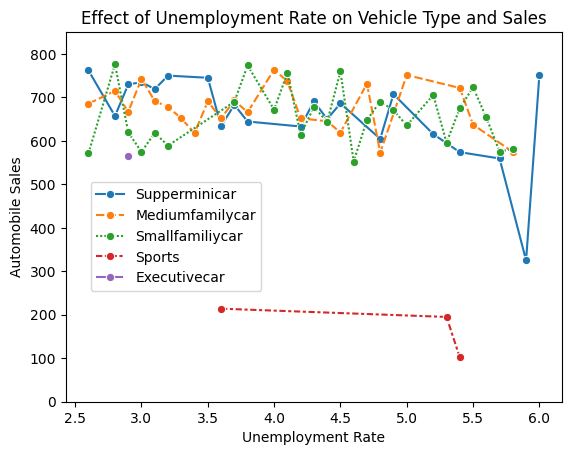

In [20]:
# Filter the data for recession period
df_rec = df[df['Recession'] == 1]

# Create the lineplot with the correct column names
sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)

# Customize plot appearance
plt.ylim(0, 850)
plt.legend(loc=(0.05, 0.3))

# Set titles and labels
plt.title('Effect of Unemployment Rate on Vehicle Type and Sales')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')

# Show the plot
plt.show()


#### From the above plot, what insights have you gained on the sales of superminicar, smallfamilycar, mediumminicar?<br> Type your answer below:-


As the unemployment rate increased during the recession, the sales of different vehicle types fluctuated. Supermini, small, and medium vehicles experienced fluctuating sales with an evident drop for supermini cars when the unemployment rate surpassed approximately 5.6%. Sales of supermini cars dropped drastically from around 600 units to around 350 units as the unemployment rate increased. Meanwhile, sports car sales showed a slight decline initially, but as the unemployment rate rose, sales dropped sharply from 5.3% to about 100 units, indicating a significant reduction in demand for sports cars during high unemployment periods.

This analysis highlights the sensitivity of vehicle sales to economic factors, with certain vehicle types, especially sports cars and superminis, experiencing more dramatic declines as the unemployment rate increases.








---


### TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period


In [21]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

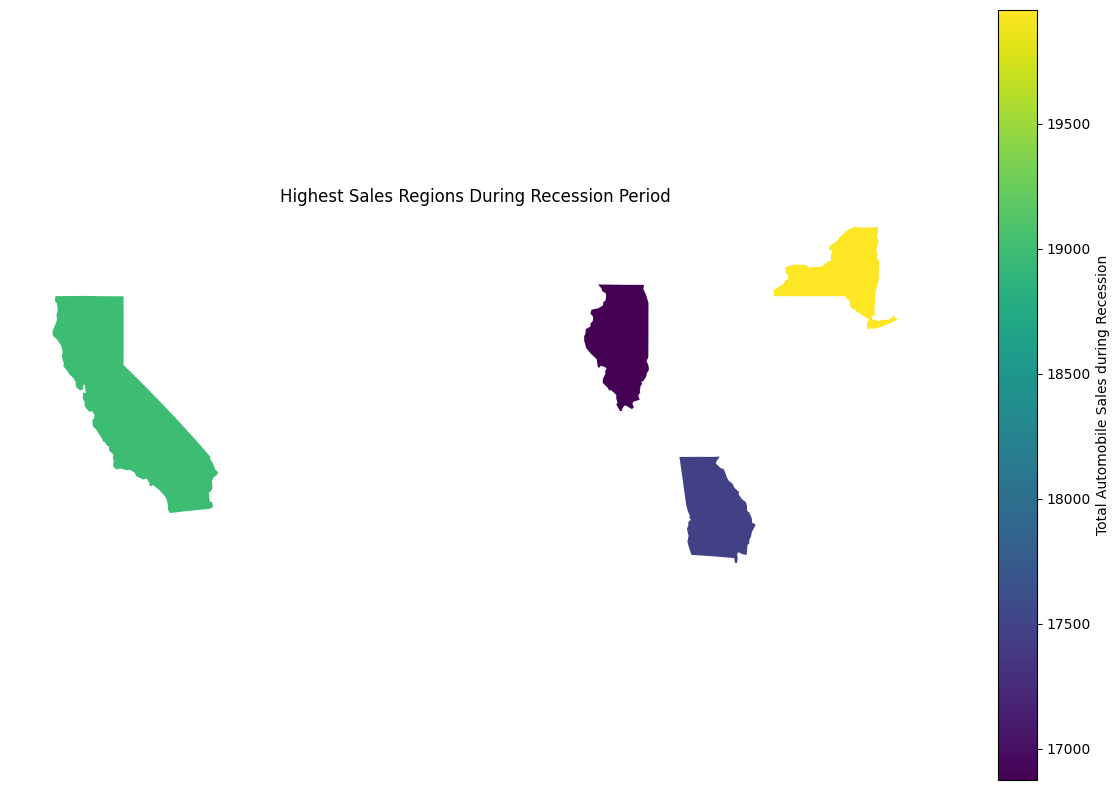

In [22]:
from pyodide.http import pyfetch
import io
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Function to download files
async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

# Download the U.S. states map file
path_us_states = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path_us_states, 'us-states.json')

# Download the sales data CSV file
path_sales_data = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv'
await download(path_sales_data, 'historical_automobile_sales.csv')

# Step 1: Load the sales data from the downloaded CSV
df = pd.read_csv('historical_automobile_sales.csv')  # Use the correct path to your sales data

# Step 2: Filter for the recession period (assuming 'Recession' column exists and is 1 during recession)
df_rec = df[df['Recession'] == 1]

# Step 3: Aggregate the sales data by region (assuming 'City' corresponds to states or regions)
sales_by_state = df_rec.groupby('City')['Automobile_Sales'].sum().reset_index()

# Step 4: Load the U.S. states map data from the downloaded file
gdf = gpd.read_file('us-states.json')

# Step 5: Merge the sales data with the geographical data (assuming 'City' maps to U.S. states)
gdf = gdf.set_index('name')  # Assuming 'name' column in geo data corresponds to 'City' in sales data
sales_by_state = sales_by_state.set_index('City')
merged = gdf.join(sales_by_state)

# Step 6: Plot the map (removing the axes)
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot the states with sales data (only those with 'Automobile_Sales' > 0 will be colored)
merged.plot(column='Automobile_Sales', ax=ax, legend=True,
            legend_kwds={'label': "Total Automobile Sales during Recession"})

# Remove the axis for a cleaner map
ax.set_axis_off()

# Title and show the plot
plt.title("Highest Sales Regions During Recession Period")
plt.show()


#### The datset also contains the location/city for company offices. Lets do the recession impact on various offices/city sales by developing a choropleth


In [23]:
# Filter the data for the recession period
recession_data = df[df['Recession'] == 1]

# Check if the filtering worked
print(recession_data.head())  # This will show the first few rows of the filtered data

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Check the aggregated sales data
print(sales_by_city.head())  # Displaying the aggregated sales data by city

# Create a base map centered on the United States
import folium

map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using Folium
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # GeoJSON file with state boundaries
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession'
).add_to(map1)

# Add tooltips to the choropleth layer
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1


        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Automobile_Sales     Vehicle_Type        City 

Recession Impact on Automobile Sales by City:

Recession Impact: The dataset focuses on automobile sales during recession periods (Recession = 1). It shows how factors like consumer confidence and unemployment rates affect sales across cities.

City-wise Sales:

California had the highest sales at 18982.6 units, indicating resilience during the recession.
New York also showed strong sales (19954.6 units), while Georgia and Illinois had slightly lower figures (17470.5 and 16874.7 units, respectively).

Economic Factors: 

Fluctuations in Consumer Confidence and Unemployment Rates impacted sales. Higher confidence generally corresponded with better sales.

Geographical Trends:

Larger markets like California and New York showed stronger sales during the recession, suggesting higher resilience in these regions.

## Summary of all key findings: 

1. **Automobile Sales Fluctuations**: Sales peaked in 1995, with sharp declines during the 2007-2009 and 1981-1982 recessions, indicating a strong correlation between recessions and sales drops.

2. **Sales Trends per Vehicle Type During Recession**: Sports cars and superminis showed resilience, while medium and small family cars were more sensitive to economic downturns.

3. **Sales Comparison During Recession vs Non-Recession**: Sales were significantly lower during recessions (600-700 units) compared to non-recession periods (2,600 units), with luxury vehicles like executive and sports cars being more impacted.

4. **GDP Comparison During Recession and Non-Recession**: GDP remained lower during recessions, affecting automobile sales due to reduced consumer spending.

5. **Impact of Seasonality on Sales**: Seasonality played a major role in sales, especially in April, where a spike in automobile purchases was observed.

6. **Price vs Sales Correlation During Recessions**: No clear correlation was found between vehicle prices and sales, suggesting that factors other than price influence sales during recessions.

7. **Advertising Expenditure During Recession and Non-Recession**: More advertising budget was allocated during non-recession periods (79%) than during recessions (21%), indicating a strategy to capitalize on favorable economic conditions.

8. **Advertising Expenditure per Vehicle Type During Recession**: Sports and executive cars received a larger share of advertising expenditure during recessions, reflecting an effort to maintain a stable customer base in luxury markets.

9. **Unemployment Rate and Vehicle Sales**: Higher unemployment rates led to decreased sales, particularly for medium family cars, while sports cars were less affected, likely due to a wealthier customer base.

10. **Recession Impact on Sales by City**: Larger cities like California and New York showed stronger sales resilience during recessions, influenced by factors like consumer confidence and unemployment rates.


## Authors


[Dr. Pooja](author_link)


## Completed By: 

Qazi Fabia Hoq (as part of the Data Science Professional Certification by IBM)

Copyright © 2023 IBM Corporation. All rights reserved.
